In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp
from astroNN.nn.layers import MCDropout
import math
# np.random.seed(0)

### In this notebook, we use a compressed version of JLA compilation
#### First, we load the trained AutoEncoder

In [2]:
np.random.seed(0)

In [3]:
file2 = '../data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))

# shuffle = [x for x in range(len(data.values)) if x%2 == 0]
# comp = [x for x in range(len(data.values)) if x%2 ==1]
# shuffle.extend(comp)
shuffle = [0,1,2,3,4,5,6,7,8,30,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]

nsize = len(syscov)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)

errors = np.diag(syscov).reshape(nsize,1)
errors = np.where(errors!= 0, np.log(errors), 0)

z = data.values[:,0][shuffle]
dl = data.values[:,1][shuffle]

# FFNN

In [4]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

# index = np.argsort(z)
zz = np.log10(z)

# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))


scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
# dll = dl.reshape(nsize, 1)


# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(zz, indx)
y = dll
y_train, y_test = np.split(y, indx)
# y


In [5]:
def model2_dropout(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
    x = MCDropout(0.001)(efirst)
#     x = Dense(100, activation='relu')(x)
#     x = MCDropout(0.001)(x)
#     x = Dense(150, activation='relu')(x)
#     x = MCDropout(0.001)(x)
    elast = Dense(1, activation='linear')(x)
    return elast

input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model2_dropout(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
MCDropout_1 (MCDropout)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [6]:
model2_train = neural_model2.fit(z_train, y_train, batch_size=1,
                                    epochs=1000,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.3897 - val_loss: 0.2449
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 1.0550 - val_loss: 0.2880
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.8976 - val_loss: 0.3347
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.7810 - val_loss: 0.3605
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.6830 - val_loss: 0.3202
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5793 - val_loss: 0.2906
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4764 - val_loss: 0.2364
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 0.1928
Epoch 9/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2753 - val_loss: 0.1205
Epoch 10/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1968 - val_loss: 0.0550

24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 5.0941e-04
Epoch 81/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 3.9436e-04
Epoch 82/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 83/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 4.9124e-04
Epoch 84/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 5.0630e-04
Epoch 85/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 3.7609e-04
Epoch 86/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 6.0965e-04
Epoch 87/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 5.3115e-04
Epoch 88/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 89/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.

24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 4.3521e-04
Epoch 159/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 160/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 9.3700e-04
Epoch 161/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 162/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 163/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.1640e-04 - val_loss: 5.6246e-04
Epoch 164/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 165/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 6.8789e-04
Epoch 166/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.9959e-04 - val_loss: 0.0012
Epoch 167/1000
24/24 [==============================] - 0s 1ms/step - los

24/24 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 8.1423e-04
Epoch 237/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 9.4758e-04
Epoch 238/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 5.6019e-04
Epoch 239/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 240/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 7.1883e-04
Epoch 241/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 5.4049e-04
Epoch 242/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 4.4947e-04
Epoch 243/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 6.7096e-04
Epoch 244/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 5.2869e-04
Epoch 245/1000
24/24 [==============================] - 0s 1ms/st

24/24 [==============================] - 0s 1ms/step - loss: 9.8339e-04 - val_loss: 6.6181e-04
Epoch 315/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 7.7364e-04
Epoch 316/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 317/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 5.3157e-04
Epoch 318/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 7.9836e-04
Epoch 319/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 320/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 321/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 322/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 5.2085e-04
Epoch 323/1000
24/24 [==============================] - 0s 1ms/step - los

24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 393/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 394/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 4.4913e-04
Epoch 395/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.5646e-04 - val_loss: 8.0055e-04
Epoch 396/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 6.3190e-04
Epoch 397/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 398/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 399/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 3.1696e-04
Epoch 400/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 401/1000
24/24 [==============================] - 0s 1ms/step - loss: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 6.9194e-04
Epoch 471/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.2455e-04 - val_loss: 7.0207e-04
Epoch 472/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.8566e-04 - val_loss: 0.0018
Epoch 473/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 4.6372e-04
Epoch 474/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 6.6286e-04
Epoch 475/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 8.3667e-04
Epoch 476/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 3.3563e-04
Epoch 477/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 478/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 8.8908e-04
Epoch 479/1000
24/24 [==============================] - 0s 1m

Epoch 548/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 5.9667e-04
Epoch 549/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 550/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 551/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 552/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 4.9817e-04
Epoch 553/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 6.2142e-04
Epoch 554/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 6.0257e-04
Epoch 555/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 5.3283e-04
Epoch 556/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 5.5031e-04
Epoch 557/1000
24/24 [==============================] - 0s

Epoch 626/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 627/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 628/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 7.0183e-04
Epoch 629/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 3.3693e-04
Epoch 630/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 631/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.1588e-04 - val_loss: 8.3257e-04
Epoch 632/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 7.9203e-04
Epoch 633/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 6.7779e-04
Epoch 634/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 635/1000
24/24 [==============================] - 0s

Epoch 704/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 6.6324e-04
Epoch 705/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 7.8055e-04
Epoch 706/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 6.6366e-04
Epoch 707/1000
24/24 [==============================] - 0s 1ms/step - loss: 7.0934e-04 - val_loss: 5.6460e-04
Epoch 708/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 7.2784e-04
Epoch 709/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 710/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 4.1112e-04
Epoch 711/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 5.5077e-04
Epoch 712/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 6.1809e-04
Epoch 713/1000
24/24 [========================

24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 6.2817e-04
Epoch 783/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 784/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 8.6544e-04
Epoch 785/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 2.9995e-04
Epoch 786/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 787/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 8.2103e-04
Epoch 788/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.1107e-04
Epoch 789/1000
24/24 [==============================] - 0s 1ms/step - loss: 9.2201e-04 - val_loss: 5.2650e-04
Epoch 790/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 4.0426e-04
Epoch 791/1000
24/24 [==============================] - 0s 1ms/st

24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 6.4375e-04
Epoch 861/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 8.6297e-04
Epoch 862/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 5.2441e-04
Epoch 863/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 864/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 8.1426e-04
Epoch 865/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 5.8560e-04
Epoch 866/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 4.3274e-04
Epoch 867/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 868/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 8.2467e-04
Epoch 869/1000
24/24 [==============================] - 0s 1ms/step -

24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 5.1840e-04
Epoch 939/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 3.3358e-04
Epoch 940/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 9.4094e-04
Epoch 941/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 5.1059e-04
Epoch 942/1000
24/24 [==============================] - 0s 1ms/step - loss: 3.8915e-04 - val_loss: 5.3481e-04
Epoch 943/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 4.7653e-04
Epoch 944/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 3.7133e-04
Epoch 945/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 5.5618e-04
Epoch 946/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 4.3828e-04
Epoch 947/1000
24/24 [==============================] - 0

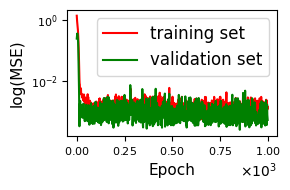

In [23]:
plt.figure(figsize=(3, 2), dpi=100)

plt.plot(model2_train.history['loss'], color='r', )
plt.plot(model2_train.history['val_loss'], color='g')

plt.ylabel('log(MSE)', fontsize=11)
plt.yscale('log')
plt.xlabel('Epoch', fontsize=11)

plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.rc('font', size=7)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.tight_layout()


plt.savefig('loss_dropoutJLA2.png')

In [8]:
# file3 = 'fake_binned_JLA2TEST3new.dat'
# data3 = np.loadtxt(file3, skiprows=3)

# z_test = data3[:,0]
z_test = zz
# z_test = np.log10(np.linspace(0.01,1.3,1000))
# x_test

In [9]:
test_batch_size = len(z_test)
# x_test = np.random.uniform(np.min(z), np.max(z), test_batch_size)
# x_test = np.linspace(np.min(z), np.max(z), test_batch_size)

mc_dropout_num = 100# Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 1))

for i in range(mc_dropout_num):
    predictions[i] = neural_model2.predict(z_test)
    

prediction_mc_dropout = np.mean(predictions, axis=0, dtype=np.float64)
std_mc_dropout = np.std(predictions, axis=0, dtype=np.float64)

# get mean results and its varience
# pred_err = np.exp(pred_random[:,1].reshape(-1,1))
# pred_err = np.exp(pred_random[:,1].reshape(-1,1))


# sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)




In [10]:
# predictions_err

In [11]:
Om = 0.27
# variance network
w0 = -1

# def RHSquared_a_lcdm(a):
# #         return Ezlcdm(a)**2
#     return Om*(1/a)**3 + 1 - Om

def RHSquared_a_owacdm(a, w0, wa):
#         return Ezlcdm(a)**2
    rhow = a**(-3*(1.0+w0+wa))*np.exp(-3*wa*(1-a))
    return (Om/a**3+(1.0-Om)*rhow)

def DistIntegrand_a(a, w0, wa):
#         if model == 'lcdm':
#             return 1./np.sqrt(RHSquared_a_lcdm(a))/a**2
#         elif model == 'owacdm':
        return 1./np.sqrt(RHSquared_a_owacdm(a, w0, wa))/a**2
    
def Da_z(z, w0, wa):
        # r=intg.quad(self.Hinv_z,0,z)
        # this version seems to be faster
        r = intg.quad(DistIntegrand_a, 1./(1+z), 1, args=(w0, wa))

        r = r[0]
      
        return r
    
def distance_modulus(z, w0=-1, wa=0.0):
        # I think this should also work with varyPrefactor as long as BAO is there too
        # assert(not self.varyPrefactor)

        # note that our Da_z is comoving, so we're only
        # multilpyting with a single (1+z) factor
#         return 5*np.log10(Da_z(z, model, w0, wa)*(1+z)) 
    return 5*np.log10(Da_z(z, w0, wa)*(1+z))+43



In [12]:
zmodel = np.linspace(0.01, 1.5, 100)
flcdm = []
fowacdm1 = []
# fowacdm2 = []
# fowacdm3 = []

# flcdm = []
for zzz in zmodel:
    flcdm.append(distance_modulus(zzz, w0=-1, wa=0))
#     fowacdm1.append(distance_modulus(zzz, w0=-1.3, wa=1.2))
    fowacdm1.append(distance_modulus(zzz, w0=-10, wa=-100))
#     fowacdm2.append(distance_modulus(zz, model='owacdm', w0=-1, wa=-0.5))
#     fowacdm3.append(distance_modulus(zz, model='owacdm', w0=-1, wa=0.0))
    
flcdm = np.array(flcdm)
fowacdm1 = np.array(fowacdm1)
# fowacdm2 = np.array(fowacdm2)
# fowacdm3 = np.array(fowacdm3)

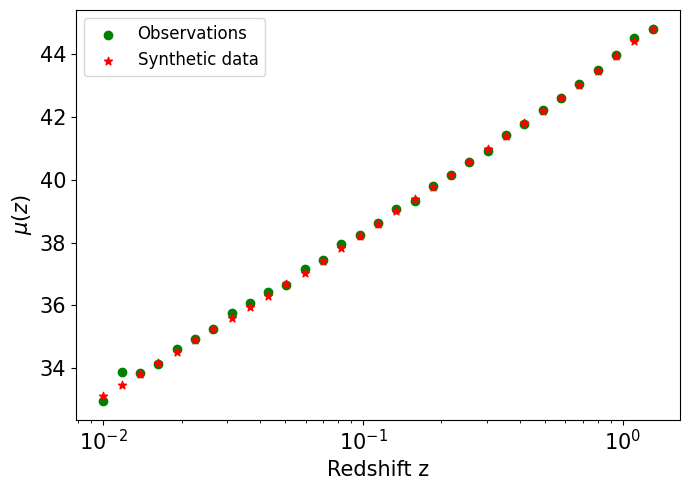

In [13]:
plt.figure(figsize=(7, 5), dpi=100)

# Plotting
dlfake = scalerdl.inverse_transform(prediction_mc_dropout.reshape(-1,1))[:,0]
# dlfake = prediction_mc_dropout[:,0]
# plt.figure(figsize=(10, 7), dpi=100)

# fakeerrors = np.sqrt(np.abs(np.diagonal(decoded_fake.reshape(31,31))))
# sigma = np.sqrt(std_mc_dropout.reshape(31,))

plt.scatter(z, dl, c='g', label='Observations')
# plt.errorbar(z, dl, errors, fmt='g.', markersize=10, label='Observations')
plt.scatter(10**z_test, dlfake, marker='*', c='r', label='Synthetic data')

# plt.errorbar(x_test, dlfake, yerr=sigma
#              , markersize=10, fmt='.', 
#              ecolor='blue', capthick=2, elinewidth=0.9, alpha=0.8, c='r',
#              label='Synthetic data')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
# plt.plot(zmodel, flcdm, label='$\Lambda CDM$', c='b')
# plt.plot(zmodel, fowacdm1, label='CPL $w_0 = -1.3, w_a=1.2$', c='m')
# plt.plot(zmodel, fowacdm2, label='$\omega_0\omega_aCDM \;\; \omega_a=-0.5$', c='y')
# plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
# plt.xlim(-0.01, np.max(z)+0.2)
plt.xlabel("Redshift z", fontsize=15)
plt.ylabel("$\mu(z)$", fontsize=15)
# plt.xlim(0, np.max(z))
plt.xticks(fontsize=15)
# plt.text(0.6, 45, 'FFNN+MC-DO', fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')

plt.tight_layout()
plt.legend(loc='upper left', fontsize=12)
# plt.show()
plt.savefig('DL_dropoutb2.png')

In [14]:
index = np.argsort(z_test)
fake_data2 = np.stack((z[index], dlfake[index]), axis=1)


# np.savetxt("fake_binned_JLADO2.dat",  fake_data2, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
# tf.keras.models.save_model(neural_model2, '../models/FFNN_JLA_DO.h5' )